### Convert Wang et al., Nat. Med., 2020

In [33]:
suppressPackageStartupMessages({
    library(Seurat)
    library(Seurat.utils)
    library(SCP)
    library(SeuratDisk)
    #library(SeuratData)
    #library(patchwork)
    library(ggplot2)
    #library(cowplot)
    #theme_set(theme_cowplot())
    library(Matrix)
    #library(SeuratWrappers)
    library(tidyverse)
    #library(reticulate)
    #library(MAST)
    #library(velocyto.R)
    #library(monocle3)
    #library(magrittr)
})
options(warn=-1)

setwd("/work3/SingleCell/Arima")
options(stringsAsFactors = F)
source("src/functions_nagai.R")

# GSE111976 (endo_WGvv_10x)

In [3]:
endo_WGvv_10x.raw = readRDS("data/wg_vv/processed/GSE111976_ct_endo_10x.rds")

In [4]:
head(endo_WGvv_10x.raw)

  [[ suppressing 34 column names ‘14_AAACCCAAGTAATACG’, ‘14_AAACCCAGTCCTTAAG’, ‘14_AAACGAAAGGCGATAC’ ... ]]



6 x 71032 sparse Matrix of class "dgCMatrix"
                                                                               
MIR1302-2HG . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
FAM138A     . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
OR4F5       . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.1  . . 2 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.3  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
AL627309.2  . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
                  
MIR1302-2HG ......
FAM138A     ......
OR4F5       ......
AL627309.1  ......
AL627309.3  ......
AL627309.2  ......

 .....suppressing 70998 columns in show(); maybe adjust 'options(max.print= *, width = *)'
 ..............................

In [5]:
# Read the annotation files
endo_WGvv_10x.celltype = read.csv("data/wg_vv/processed/GSE111976_summary_10x_day_donor_ctype.csv.gz", row.names = 1)

dim(endo_WGvv_10x.celltype)

head(endo_WGvv_10x.celltype)

[1] 71032     4

,day,donor,cell_type,cell_name
,<int>,<int>,<chr>,<chr>
14_AAACCCAAGTAATACG,17,14,Stromal fibroblasts,14_AAACCCAAGTAATACG
14_AAACCCAGTCCTTAAG,17,14,Stromal fibroblasts,14_AAACCCAGTCCTTAAG
14_AAACGAAAGGCGATAC,17,14,Unciliated epithelia 1,14_AAACGAAAGGCGATAC
14_AAACGCTAGACTGTTC,17,14,Unciliated epithelia 1,14_AAACGCTAGACTGTTC
14_AAACGCTAGAGTGTTA,17,14,Unciliated epithelia 1,14_AAACGCTAGAGTGTTA
14_AAACGCTAGTCTAGCT,17,14,Unciliated epithelia 1,14_AAACGCTAGTCTAGCT


In [6]:
table(endo_WGvv_10x.celltype$cell_type)


              Ciliated             Endothelia            Lymphocytes 
                  4393                   2033                   5526 
           Macrophages    Smooth muscle cells    Stromal fibroblasts 
                   487                   1266                  22102 
Unciliated epithelia 1 Unciliated epithelia 2 
                 18826                  16399 

In [7]:
endo_WGvv_10x.phase = read.csv("data/wg_vv/processed/GSE111976_summary_10x_donor_phase.csv.gz")
dim(endo_WGvv_10x.phase)
head(endo_WGvv_10x.phase)

[1] 10  2

,donor,phase_canonical
,<int>,<chr>
1,14,secretory_early
2,19,proliferative
3,20,secretory_mid
4,29,secretory_early-mid
5,39,secretory_early-mid
6,41,secretory_early-mid


In [8]:
# merge donor_phase file into metadata of object

metadata <- merge(endo_WGvv_10x.celltype, endo_WGvv_10x.phase, by = "donor", all = TRUE)
rownames(metadata) <- rownames(endo_WGvv_10x.celltype)
head(metadata)
dim(metadata)

,donor,day,cell_type,cell_name,phase_canonical
,<int>,<int>,<chr>,<chr>,<chr>
14_AAACCCAAGTAATACG,14,17,Stromal fibroblasts,14_AAACCCAAGTAATACG,secretory_early
14_AAACCCAGTCCTTAAG,14,17,Stromal fibroblasts,14_AAACCCAGTCCTTAAG,secretory_early
14_AAACGAAAGGCGATAC,14,17,Unciliated epithelia 1,14_AAACGAAAGGCGATAC,secretory_early
14_AAACGCTAGACTGTTC,14,17,Unciliated epithelia 1,14_AAACGCTAGACTGTTC,secretory_early
14_AAACGCTAGAGTGTTA,14,17,Unciliated epithelia 1,14_AAACGCTAGAGTGTTA,secretory_early
14_AAACGCTAGTCTAGCT,14,17,Unciliated epithelia 1,14_AAACGCTAGTCTAGCT,secretory_early


[1] 71032     5

In [9]:
length(endo_WGvv_10x.phase$donor)
table(endo_WGvv_10x.phase$phase_canonical)

[1] 10


      proliferative     secretory_early secretory_early-mid      secretory_late 
                  2                   3                   3                   1 
      secretory_mid 
                  1 

In [10]:
endo_WGvv_10x = CreateSeuratObject(counts = endo_WGvv_10x.raw, meta.data = metadata)
endo_WGvv_10x

An object of class Seurat 
33538 features across 71032 samples within 1 assay 
Active assay: RNA (33538 features, 0 variable features)

In [11]:
head(endo_WGvv_10x@meta.data)
table(endo_WGvv_10x@meta.data$donor)

,orig.ident,nCount_RNA,nFeature_RNA,donor,day,cell_type,cell_name,phase_canonical
,<fct>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
14_AAACCCAAGTAATACG,14,11202,3048,14,17,Stromal fibroblasts,14_AAACCCAAGTAATACG,secretory_early
14_AAACCCAGTCCTTAAG,14,4453,1905,14,17,Stromal fibroblasts,14_AAACCCAGTCCTTAAG,secretory_early
14_AAACGAAAGGCGATAC,14,18424,4848,14,17,Unciliated epithelia 1,14_AAACGAAAGGCGATAC,secretory_early
14_AAACGCTAGACTGTTC,14,13840,3894,14,17,Unciliated epithelia 1,14_AAACGCTAGACTGTTC,secretory_early
14_AAACGCTAGAGTGTTA,14,50727,6445,14,17,Unciliated epithelia 1,14_AAACGCTAGAGTGTTA,secretory_early
14_AAACGCTAGTCTAGCT,14,50770,6921,14,17,Unciliated epithelia 1,14_AAACGCTAGTCTAGCT,secretory_early



   14    19    20    29    39    41    57    58    60    63 
 4177  4944  9436 17261  9967  5630  4740  5270  4722  4885 

In [12]:
# keep original object as backup
so <- endo_WGvv_10x

In [13]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,donor,day,cell_type,cell_name,phase_canonical
,<fct>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>
14_AAACCCAAGTAATACG,14,11202,3048,14,17,Stromal fibroblasts,14_AAACCCAAGTAATACG,secretory_early
14_AAACCCAGTCCTTAAG,14,4453,1905,14,17,Stromal fibroblasts,14_AAACCCAGTCCTTAAG,secretory_early
14_AAACGAAAGGCGATAC,14,18424,4848,14,17,Unciliated epithelia 1,14_AAACGAAAGGCGATAC,secretory_early
14_AAACGCTAGACTGTTC,14,13840,3894,14,17,Unciliated epithelia 1,14_AAACGCTAGACTGTTC,secretory_early
14_AAACGCTAGAGTGTTA,14,50727,6445,14,17,Unciliated epithelia 1,14_AAACGCTAGAGTGTTA,secretory_early
14_AAACGCTAGTCTAGCT,14,50770,6921,14,17,Unciliated epithelia 1,14_AAACGCTAGTCTAGCT,secretory_early


In [14]:
# check if include any of UMAP, tSNE or PCA

so@reductions

list()

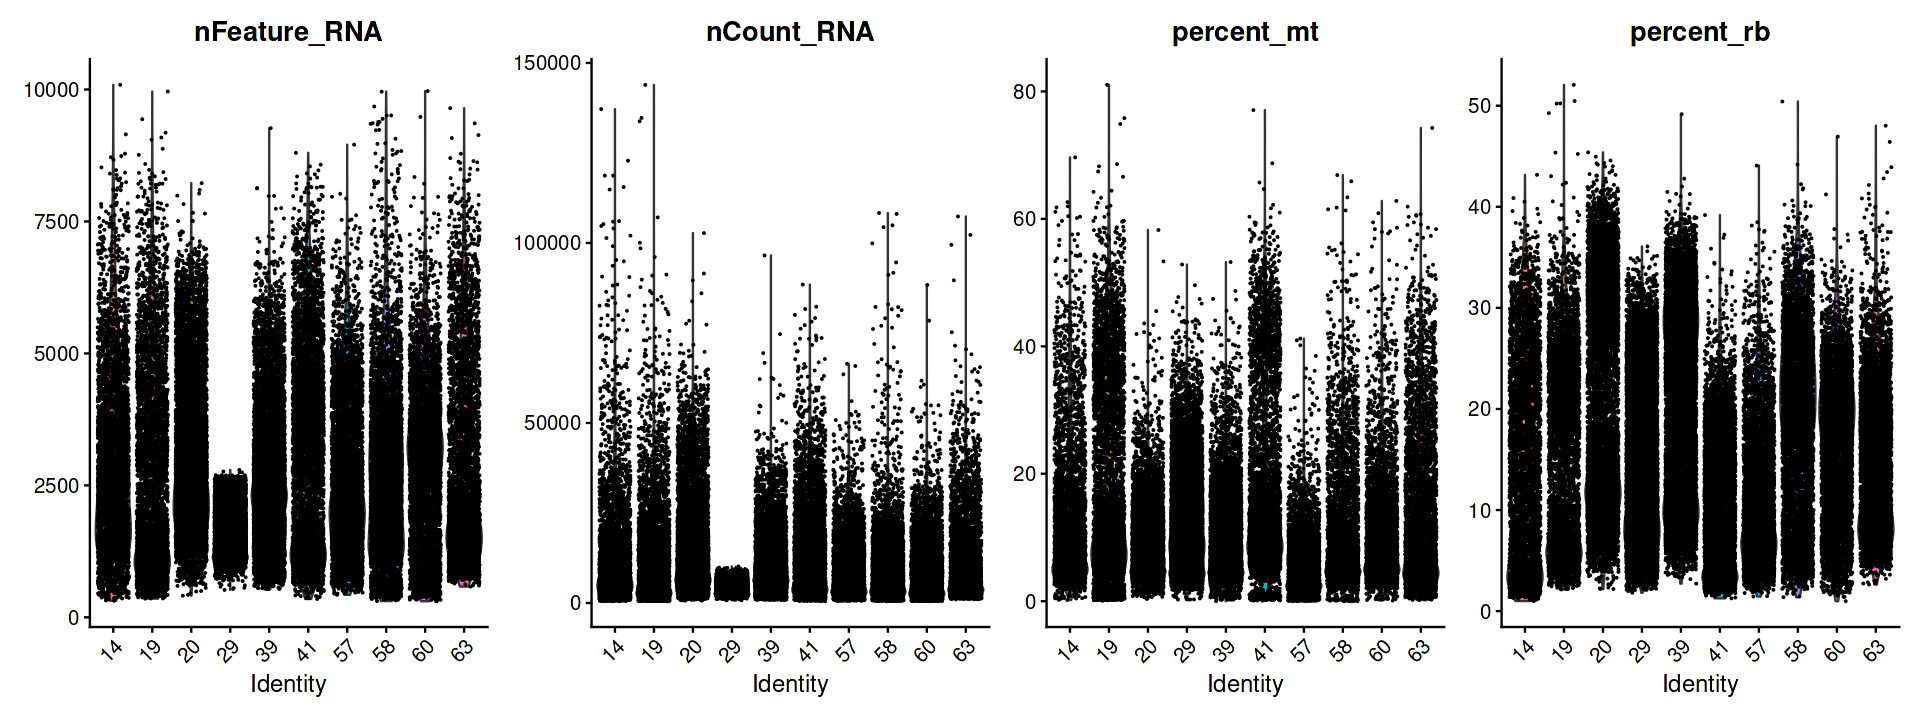

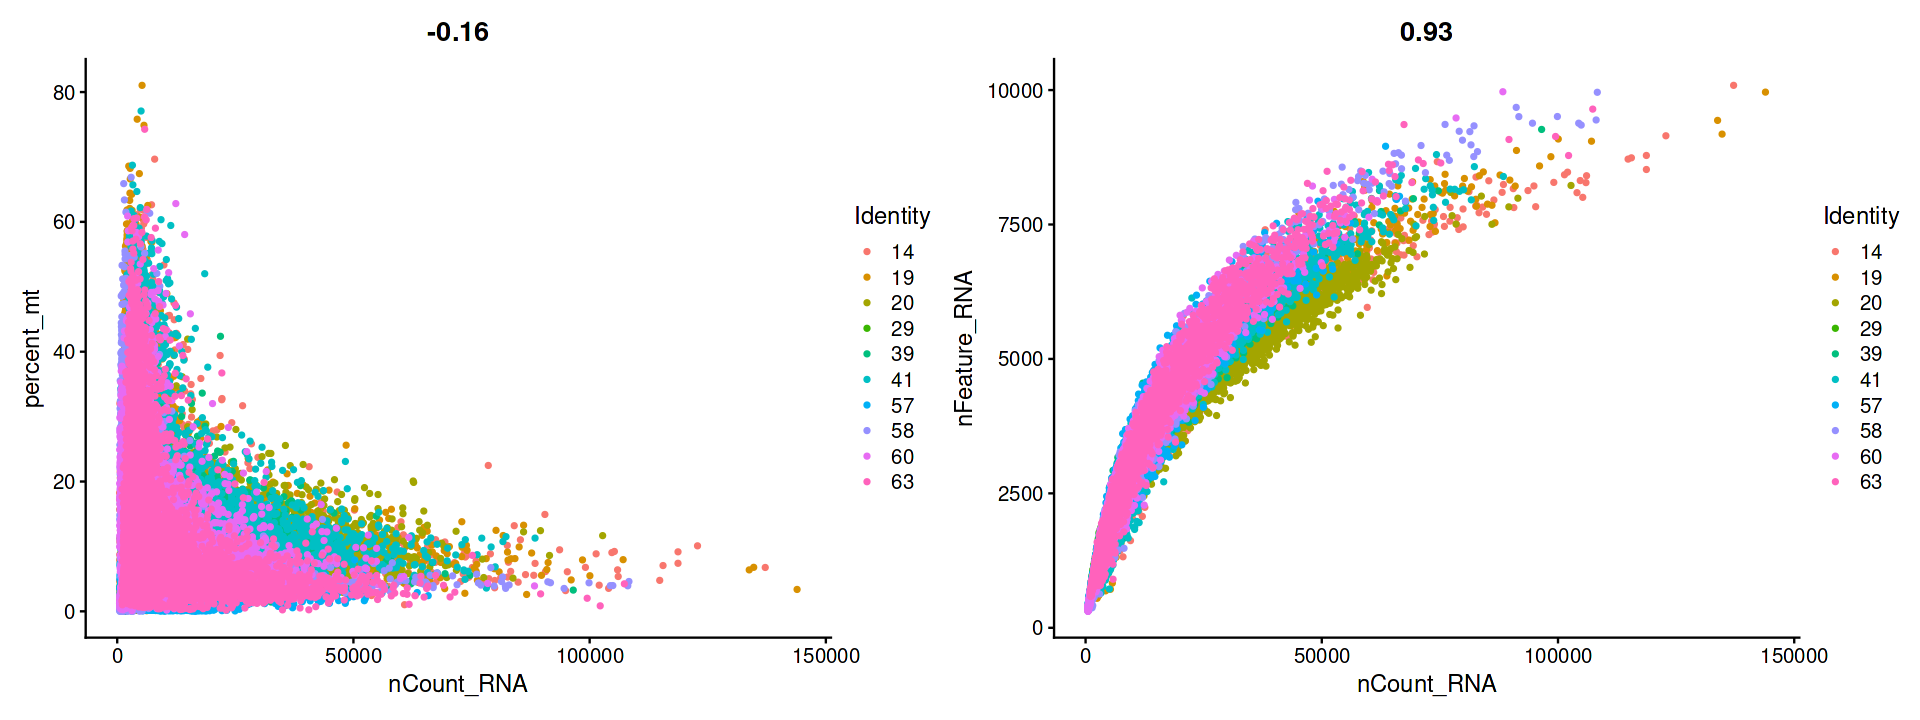

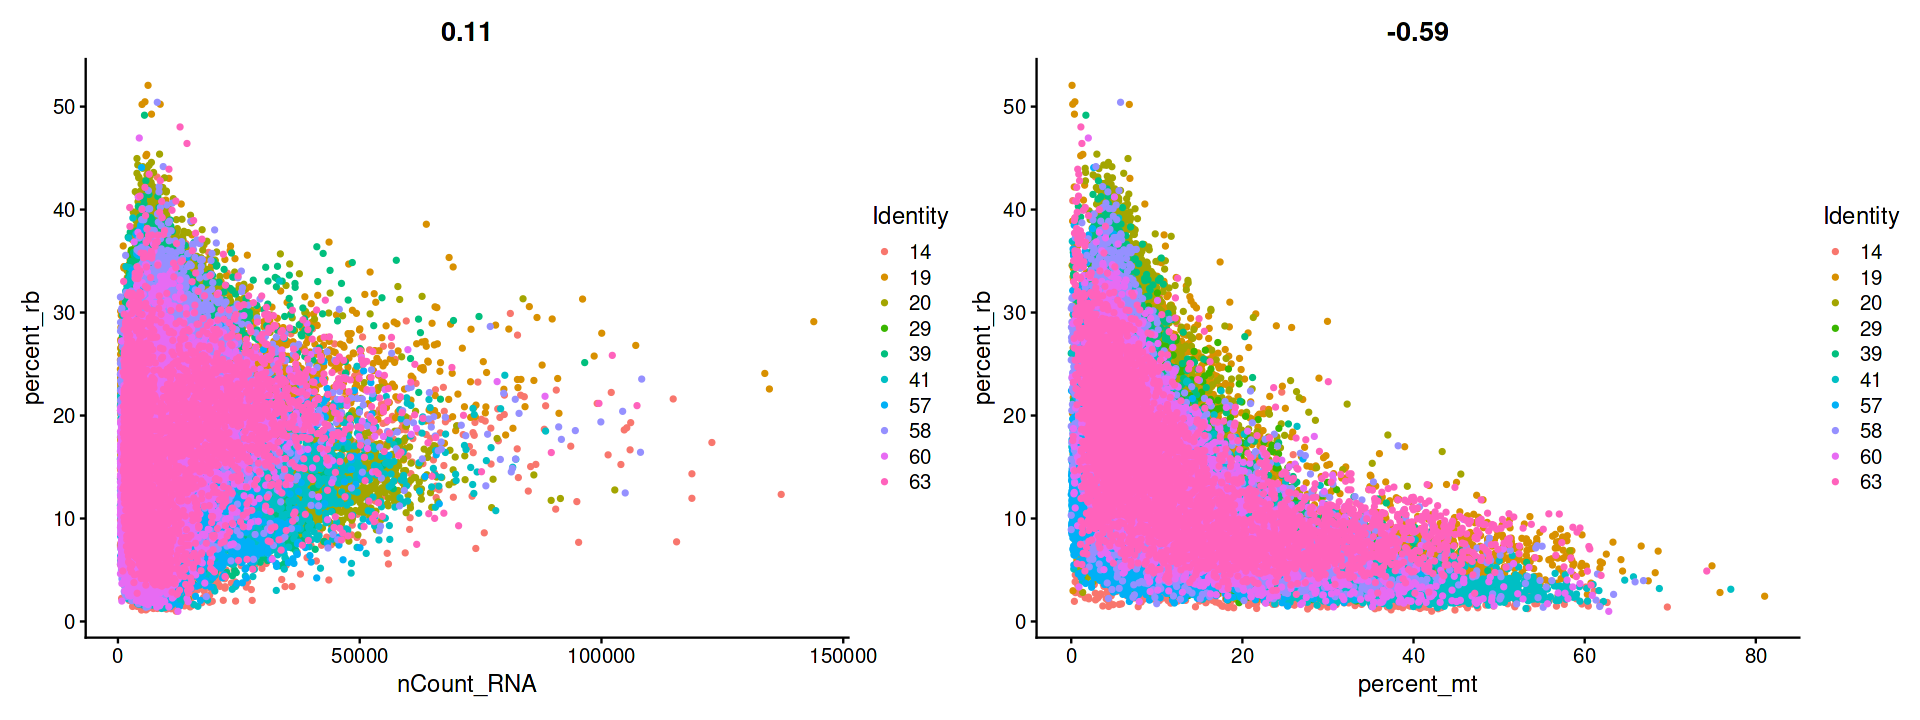

In [18]:
# QC plots separated by donor
so <- do_QC(so, "results/2023-01", "run_1")

### Observations:

- Data from this paper has already been preprocessed, therefore we won't do any quality control. Only check overall data quality for confirmation. 
- For instance, quality of the sample from donor 29 seems to have very few counts and genes identified. It could be some possible technical issue, but it has not beem described in the paper. 

In [19]:
head(so@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,donor,day,cell_type,cell_name,phase_canonical,percent_mt,percent_rb
,<fct>,<dbl>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<dbl>,<dbl>
14_AAACCCAAGTAATACG,14,11202,3048,14,17,Stromal fibroblasts,14_AAACCCAAGTAATACG,secretory_early,4.276022,25.406177
14_AAACCCAGTCCTTAAG,14,4453,1905,14,17,Stromal fibroblasts,14_AAACCCAGTCCTTAAG,secretory_early,2.066023,12.238940
14_AAACGAAAGGCGATAC,14,18424,4848,14,17,Unciliated epithelia 1,14_AAACGAAAGGCGATAC,secretory_early,9.791576,3.549718
14_AAACGCTAGACTGTTC,14,13840,3894,14,17,Unciliated epithelia 1,14_AAACGCTAGACTGTTC,secretory_early,7.919075,13.186416
14_AAACGCTAGAGTGTTA,14,50727,6445,14,17,Unciliated epithelia 1,14_AAACGCTAGAGTGTTA,secretory_early,5.505944,7.674414
14_AAACGCTAGTCTAGCT,14,50770,6921,14,17,Unciliated epithelia 1,14_AAACGCTAGTCTAGCT,secretory_early,8.453811,18.302147


In [20]:
str(so)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:179093673] 20 21 26 39 43 45 46 51 53 57 ...
  .. .. .. .. .. ..@ p       : int [1:71033] 0 3048 4953 9801 13695 20140 27061 29028 32036 38446 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 33538 71032
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:33538] "MIR1302-2HG" "FAM138A" "OR4F5" "AL627309.1" ...
  .. .. .. .. .. .. ..$ : chr [1:71032] "14_AAACCCAAGTAATACG" "14_AAACCCAGTCCTTAAG" "14_AAACGAAAGGCGATAC" "14_AAACGCTAGACTGTTC" ...
  .. .. .. .. .. ..@ x       : num [1:179093673] 2 1 2 1 1 1 1 3 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:179093673] 20 21 2

In [21]:
so <- do_SCT_cluster(so)

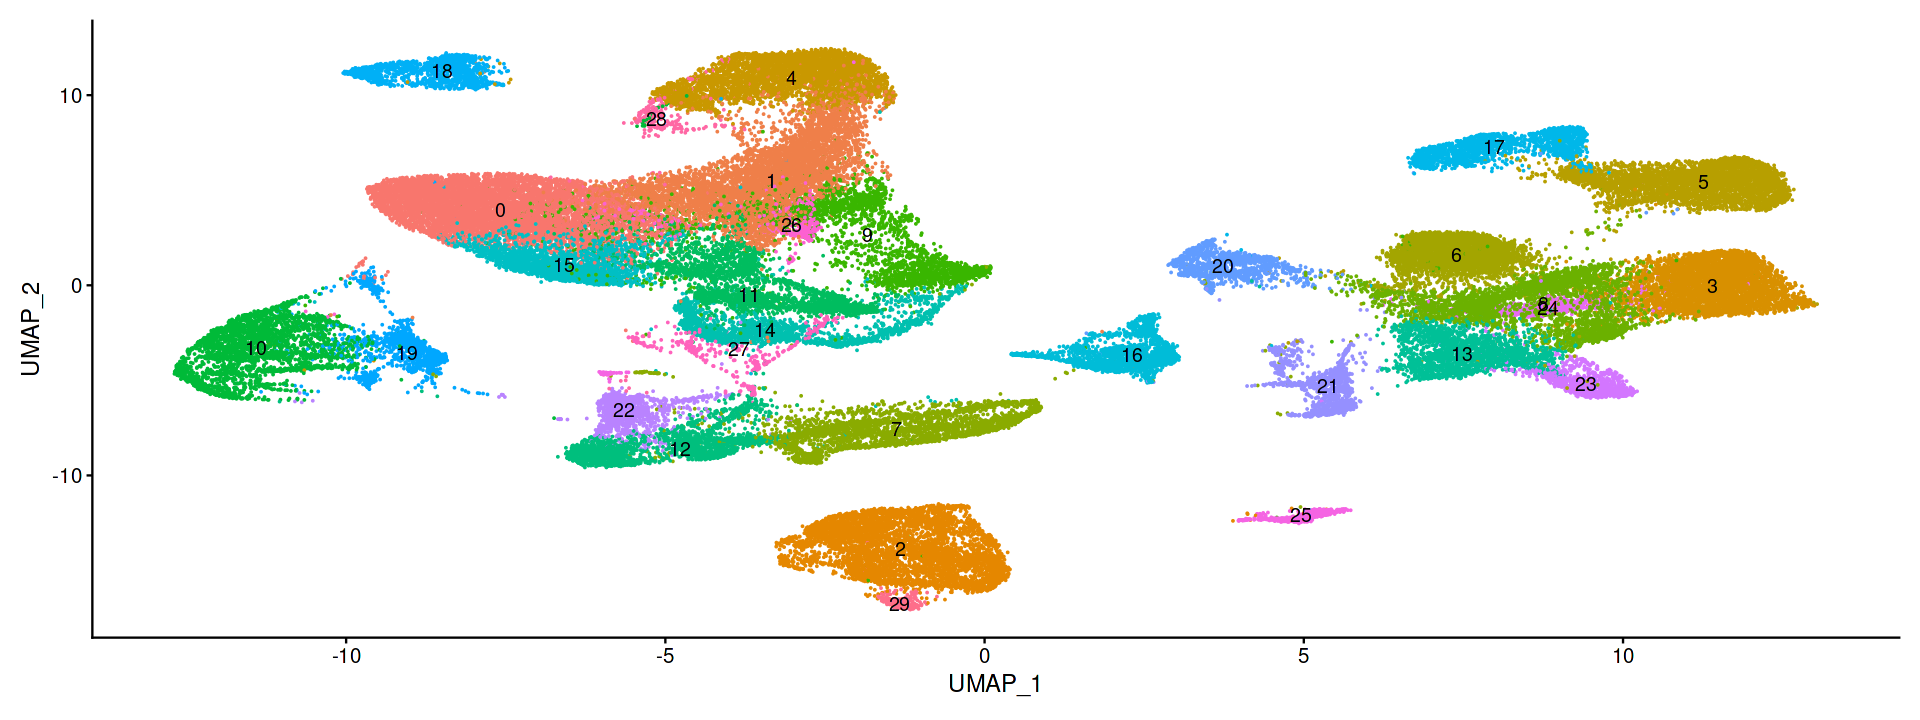

In [22]:
DimPlot(so, label = TRUE) + NoLegend()

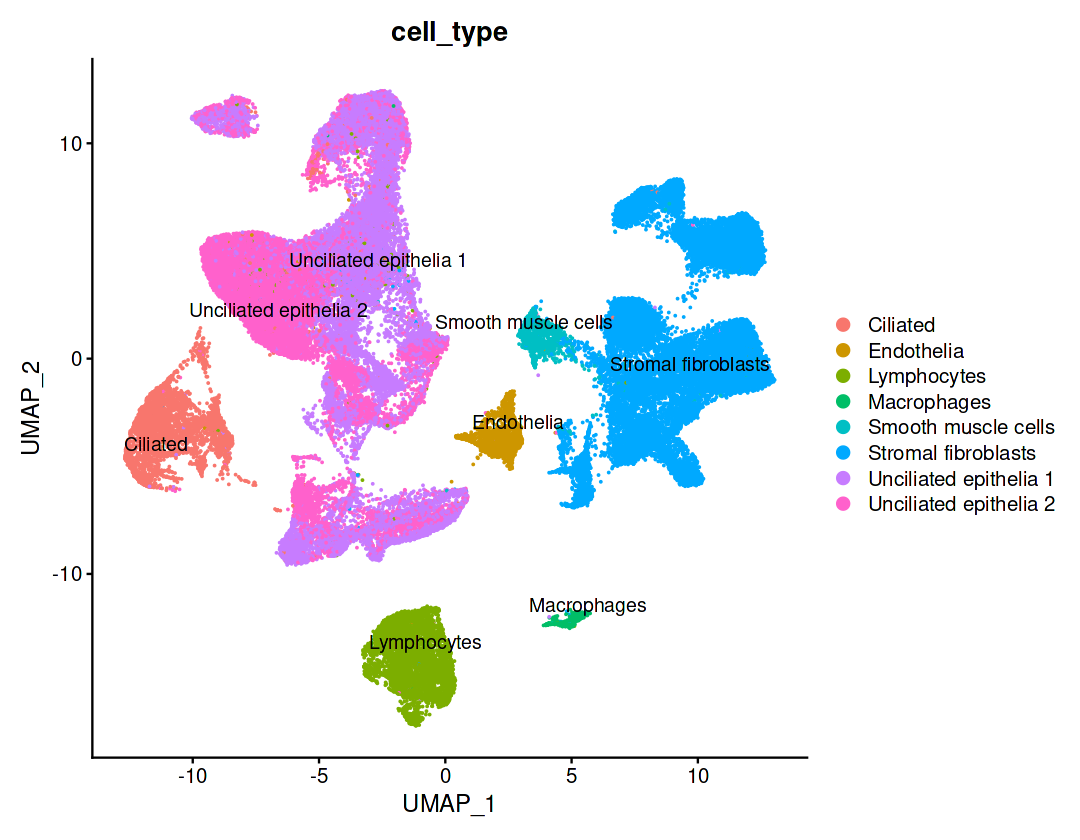

In [24]:
plot.width = 9
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so, reduction = "umap", group.by = "cell_type", label = TRUE, repel = TRUE)
ggsave(file="results/2023-01/wang_umap_1.pdf", width = plot.width, height = plot.height)

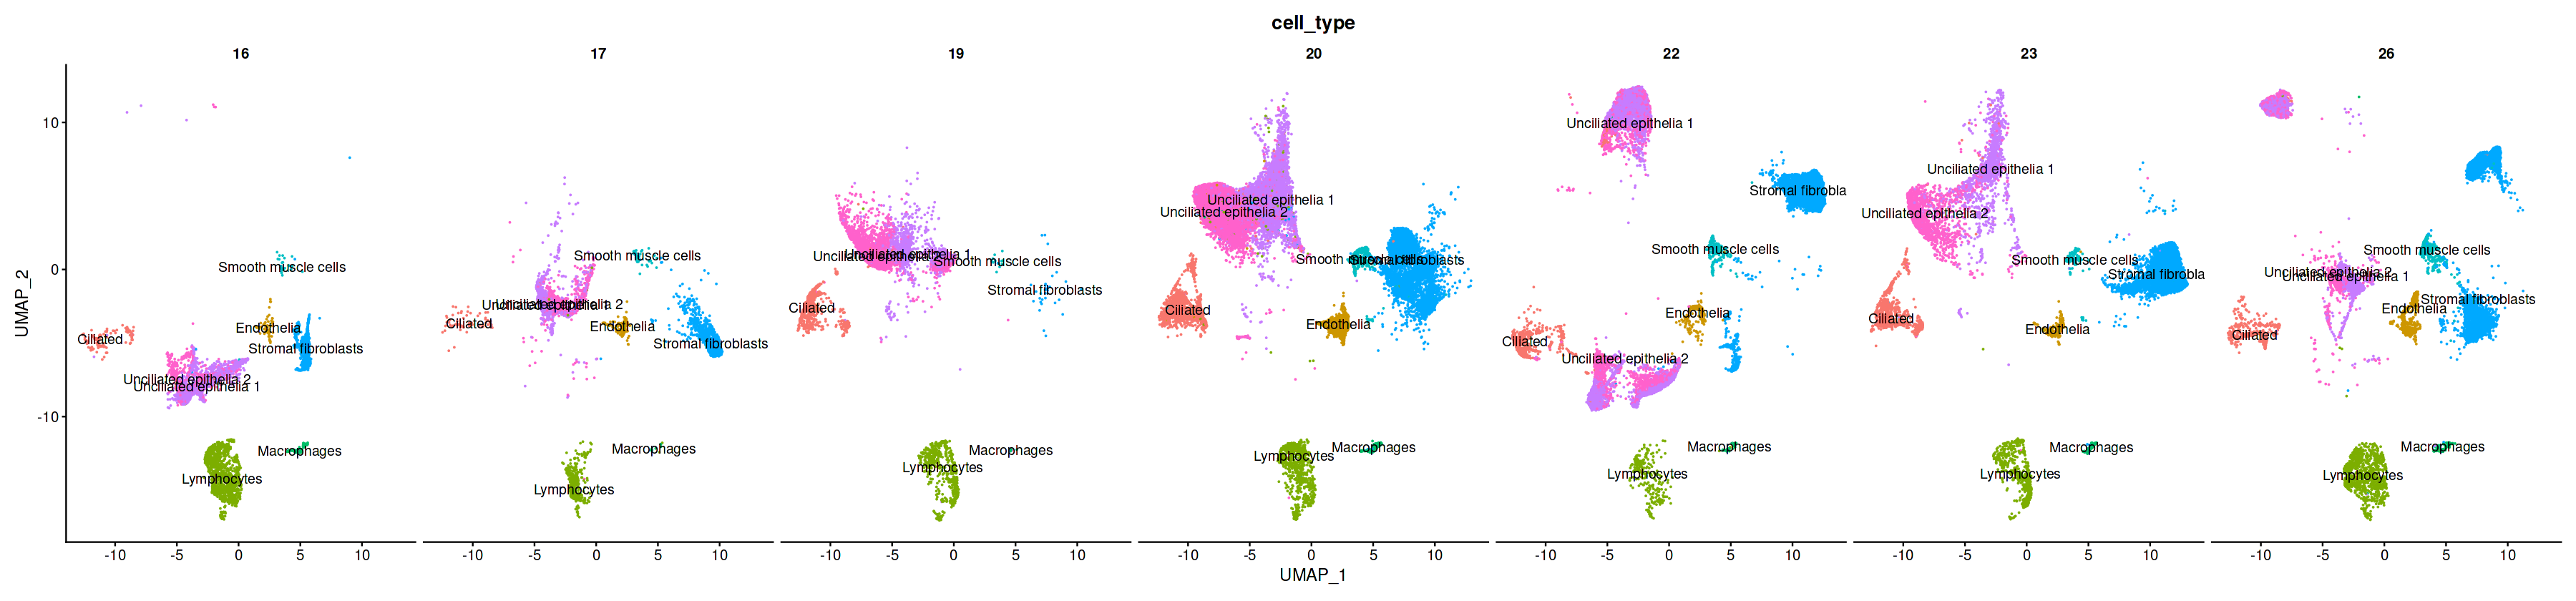

In [25]:
plot.width = 30
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so, reduction = "umap", group.by = "cell_type", split.by = "day", label = TRUE) + NoLegend()
ggsave(file="results/2023-01/wang_umap_split_day.pdf", width = plot.width, height = plot.height)

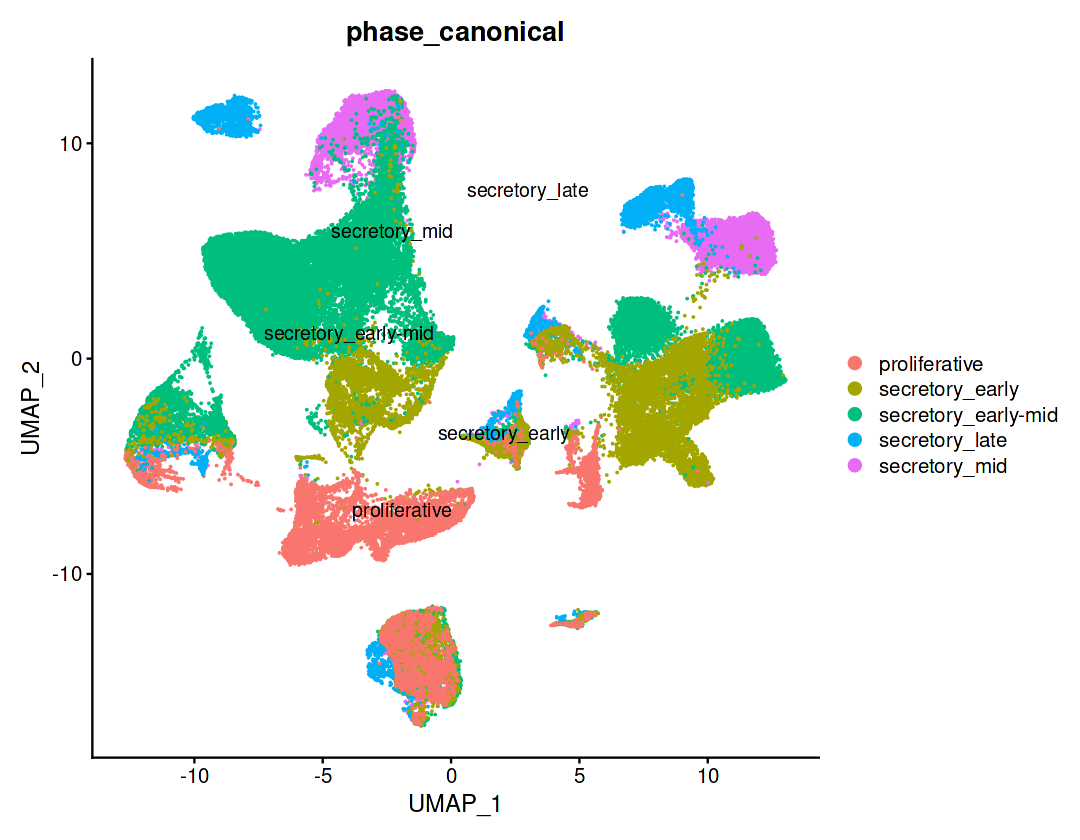

In [26]:
plot.width = 9
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so, reduction = "umap", group.by = "phase_canonical", label = TRUE, repel = TRUE)
ggsave(file="results/2023-01/wang_umap_2.pdf", width = plot.width, height = plot.height)

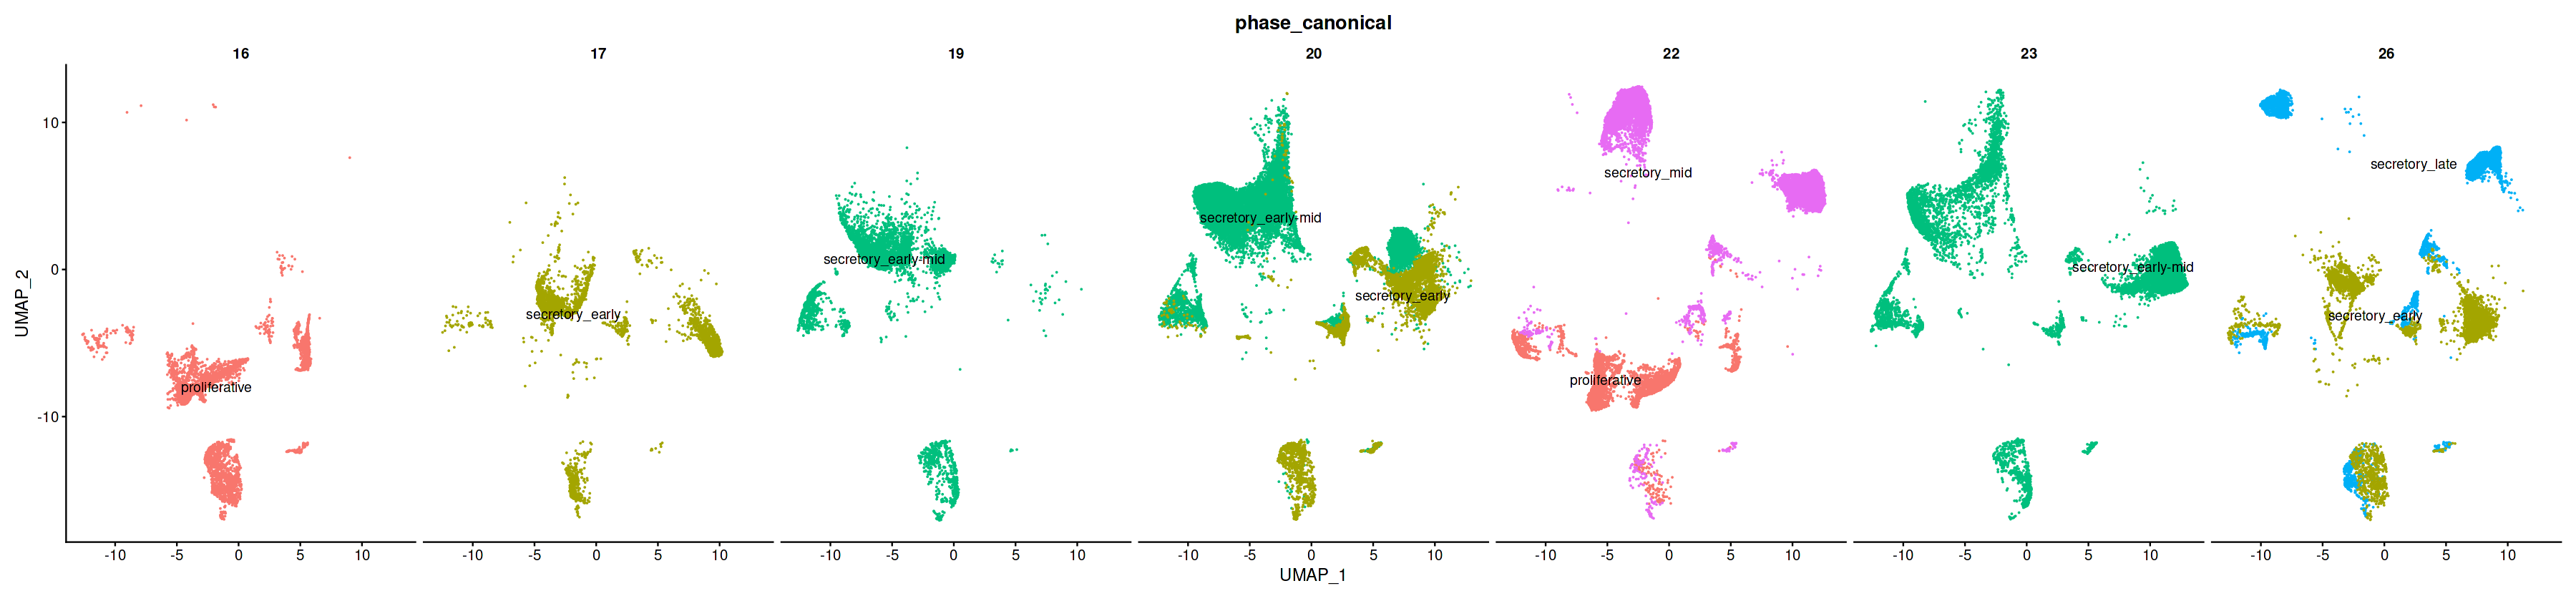

In [27]:
plot.width = 30
plot.height = 7
options(repr.plot.width = plot.width, repr.plot.height = plot.height)
DimPlot(so, reduction = "umap", group.by = "phase_canonical", split.by = "day", label = TRUE) + NoLegend()
ggsave(file="results/2023-01/wang_umap_split_day_phase_canonical.pdf", width = plot.width, height = plot.height)

In [28]:
saveRDS(so, file = "data/wg_vv/processed/wg_vv.rds")

In [35]:
adata <- srt_to_adata(so)
adata

Assay 'SCT' is in the srt object but not converted.

'misc' slot is not converted.

'tools' slot is not converted.



AnnData object with n_obs × n_vars = 71032 × 33538
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'donor', 'day', 'cell_type', 'cell_name', 'phase_canonical', 'percent_mt', 'percent_rb', 'nCount_SCT', 'nFeature_SCT', 'SCT_snn_res.0.1', 'SCT_snn_res.0.3', 'SCT_snn_res.0.5', 'SCT_snn_res.0.8', 'seurat_clusters'
    var: 'features'
    obsm: 'pca', 'umap'
    obsp: 'SCT_nn', 'SCT_snn'

In [30]:
adata$write_h5ad("data/wg_vv/processed/wg_vv.h5ad")

None

In [34]:
# also convert to h5seurat
Convert("data/wg_vv/processed/wg_vv.h5ad", dest = "data/wg_vv/processed/wg_vv.h5seurat", overwrite = TRUE)

Creating h5Seurat file for version 3.1.5.9900

Adding X as scale.data

Adding X as data

Adding X as counts

Adding meta.features from var

Adding pca as cell embeddings for pca

Adding umap as cell embeddings for umap



In [31]:
sessionInfo()

R version 4.2.2 Patched (2022-11-10 r83330)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 20.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/atlas/libblas.so.3.10.3
LAPACK: /usr/lib/x86_64-linux-gnu/atlas/liblapack.so.3.10.3

locale:
 [1] LC_CTYPE=C.UTF-8       LC_NUMERIC=C           LC_TIME=C.UTF-8       
 [4] LC_COLLATE=C.UTF-8     LC_MONETARY=C.UTF-8    LC_MESSAGES=C.UTF-8   
 [7] LC_PAPER=C.UTF-8       LC_NAME=C              LC_ADDRESS=C          
[10] LC_TELEPHONE=C         LC_MEASUREMENT=C.UTF-8 LC_IDENTIFICATION=C   

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] sctransform_0.3.5     patchwork_1.1.2       forcats_0.5.2        
 [4] stringr_1.5.0         dplyr_1.1.1           purrr_1.0.1          
 [7] readr_2.1.3           tidyr_1.3.0           tibble_3.2.1         
[10] tidyverse_1.3.2       Matrix_1.5-3          SCP_0.2.7            
[13] Seurat.utils_1.6.3  